<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/3.3_Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 Unconstrained Optimization

Functional integration plays a fundamental role in multivariable calculus and physical applications. It extends the idea of single-variable integration to multiple variables and surfaces, allowing us to compute areas, volumes, and other quantities of interest in higher dimensions.


### 3.3.1 Necessary and Sufficient Conditions of Local Minimizers


**Definition (Global Minimizer)**  
Let $f : \mathbb{R}^d \rightarrow \mathbb{R}$. The point $x^* \in \mathbb{R}^d$ is a global minimizer of $f$ if:
$$
f(x) \geq f(x^*)
$$
for all $x \in \mathbb{R}^d$.

----

**Definition (Local Minimizer)**  
Let $f : \mathbb{R}^d \rightarrow \mathbb{R}$. The point $x^* \in \mathbb{R}^d$ is a local minimizer of $f$ if there exists a neighborhood $U$ of $x^*$ such that:
$$
f(x) \geq f(x^*)
$$
for all $x \in U$.

----

**Definition (Descent Direction)**  
A vector $d \in \mathbb{R}^d$ is called a descent direction of $f$ at $x$ if:
$$
\nabla f(x)^T d < 0
$$
where $\nabla f(x)$ is the gradient of $f$ at $x$.

----

**Lemma (Descent Direction and Directional Derivative)**  
The directional derivative of $f$ at $x$ in the direction $d$ is defined as:
$$
\frac{\partial f(x)}{\partial d} = \nabla f(x)^T d
$$
If $\frac{\partial f(x)}{\partial d} < 0$, then $d$ is a descent direction.

----

**Lemma (Existence of a Descent Direction)**  
If $x^*$ is not a local minimizer of $f$, then there exists a descent direction $d$ at $x^*$ such that:
$$
\nabla f(x^*)^T d < 0
$$

----

**Theorem (First-Order Necessary Condition)**  
Let $f : \mathbb{R}^d \rightarrow \mathbb{R}$ be continuously differentiable. If $x^*$ is a local minimizer, then:
$$
\nabla f(x^*) = 0
$$

----

**Definition (Hessian Matrix)**  
The Hessian matrix $H_f(x)$ of a function $f$ is the square matrix of second-order partial derivatives:
$$
H_f(x) = \begin{pmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \dots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \dots & \frac{\partial^2 f}{\partial x_n^2}
\end{pmatrix}
$$

----

**Theorem (Second-Order Necessary Condition)**  
If $x^*$ is a local minimizer of $f$ and $f$ is twice continuously differentiable, then:
$$
H_f(x^*) \text{ is positive semi-definite.}
$$


#### 3.3.1.1 Sufficient Conditions for Local Minimizers


**Example**  
Consider the function $f(x) = x^2 + y^2$. The Hessian is:
$$
H_f(x, y) = \begin{pmatrix}
2 & 0 \\
0 & 2
\end{pmatrix}
$$
Since $H_f(x, y)$ is positive definite, $f(x, y)$ has a local minimum at $(0, 0)$.

----

**Theorem (Second-Order Sufficient Condition)**  
Let $f : \mathbb{R}^d \rightarrow \mathbb{R}$ be twice continuously differentiable. If $\nabla f(x^*) = 0$ and $H_f(x^*)$ is positive definite, then $x^*$ is a strict local minimizer.


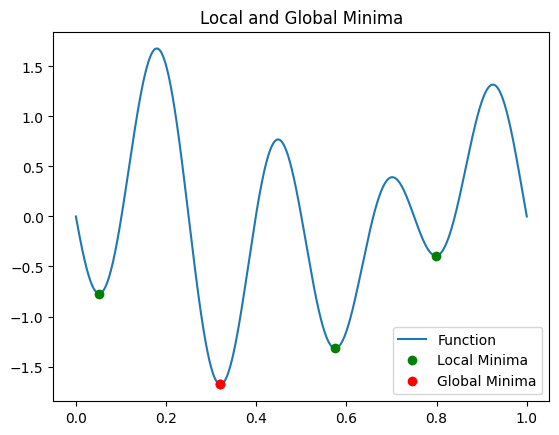

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

X = np.linspace(0, 1, 1000)
f_x = np.sin(2 * np.pi * X) * np.sin(4 * np.pi * X) - np.sin(8 * np.pi * X)

# Find global minima
min_x = X[np.argmin(f_x)]
min_y = np.min(f_x)

# Find local minima
local_min_x = X[argrelextrema(f_x, np.less)[0]]
local_min_y = f_x[argrelextrema(f_x, np.less)[0]]

plt.figure()
plt.plot(X, f_x, label="Function")
plt.plot(local_min_x, local_min_y, 'go', label="Local Minima")
plt.plot(min_x, min_y, 'ro', label="Global Minima")
plt.title("Local and Global Minima")
plt.legend()
plt.show()


### 3.3.2 Convexity and Global Minimizers


In multivariable calculus, integration extends the concept of a single integral to higher dimensions, allowing the computation of volumes, surface areas, and other physical quantities across regions in $\mathbb{R}^n$.


#### 3.3.2.1 Convex Sets and Functions


**Definition (Convex Set)**  
A set $C \subset \mathbb{R}^d$ is convex if for any $x, y \in C$ and any $\lambda \in [0, 1]$:
$$
\lambda x + (1 - \lambda) y \in C
$$

----

**Example**  
The set $C = \{ x \in \mathbb{R}^2 : x_1^2 + x_2^2 \leq 1 \}$ is convex.

----

**Definition (Convex Function)**  
A function $f : \mathbb{R}^d \rightarrow \mathbb{R}$ is convex if for all $x, y \in \mathbb{R}^d$ and $\lambda \in [0, 1]$:
$$
f(\lambda x + (1 - \lambda) y) \leq \lambda f(x) + (1 - \lambda) f(y)
$$

----

**Lemma (Affine Functions are Convex)**  
Any affine function $f(x) = a^T x + b$ is convex.

----

**Lemma (First-Order Convexity Condition)**  
A differentiable function $f : \mathbb{R}^d \rightarrow \mathbb{R}$ is convex if and only if:
$$
f(y) \geq f(x) + \nabla f(x)^T (y - x)
$$
for all $x, y \in \mathbb{R}^d$.

----

**Lemma (Second-Order Convexity Condition)**  
A twice-differentiable function $f : \mathbb{R}^d \rightarrow \mathbb{R}$ is convex if and only if its Hessian is positive semi-definite:
$$
H_f(x) \succeq 0
$$
for all $x \in \mathbb{R}^d$.

----

**Example**  
The function $f(x) = x^2$ is convex because its second derivative, $f''(x) = 2$, is positive.


#### 3.3.2.2 Global Minimizers of Convex Functions


**Theorem**  
If $f$ is convex, then any local minimizer is a global minimizer.

----

**Theorem (Global Minimizers of Convex Functions)**  
Let $f : \mathbb{R}^d \rightarrow \mathbb{R}$ be convex. Then, $x^*$ is a global minimizer of $f$ if and only if:
$$
\nabla f(x^*) = 0
$$

----

**Example**  
Consider the convex function $f(x) = x^2$. The global minimizer is at $x^* = 0$, where $\nabla f(0) = 0$.


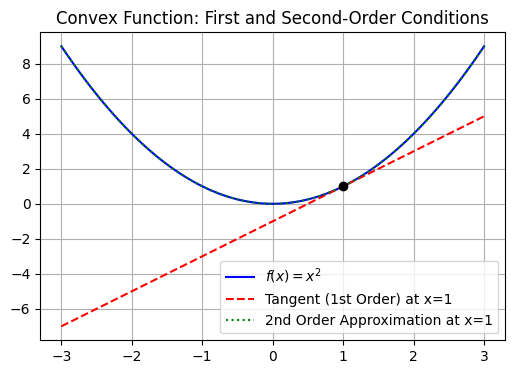

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# f(x) = x^2
def convex_function(x):
    return x**2

# First-order condition: tangent line at x0
def tangent_line(x0, x):
    return 2 * x0 * (x - x0) + convex_function(x0)

# Second-order condition: quadratic approximation
def second_order_approximation(x0, x):
    return convex_function(x0) + 2 * x0 * (x - x0) + (x - x0)**2

X = np.linspace(-3, 3, 100)
f_X = convex_function(X)

# Tangent line and second-order approximation at x0 = 1
x0 = 1
tangent = tangent_line(x0, X)
second_order = second_order_approximation(x0, X)

plt.figure(figsize=(6, 4))
plt.plot(X, f_X, label=r"$f(x) = x^2$", color="b")
plt.plot(X, tangent, label=f"Tangent (1st Order) at x={x0}", linestyle="--", color="r")
plt.plot(X, second_order, label=f"2nd Order Approximation at x={x0}", linestyle=":", color="g")
plt.scatter([x0], [convex_function(x0)], color="black", zorder=5)
plt.title("Convex Function: First and Second-Order Conditions")
plt.legend()
plt.grid()
plt.show()


### 3.3.3 Gradient Descent

Gradient descent is an iterative optimization algorithm for finding a local minimum of a differentiable function. Once we know a function has a minimizer, we will discuss a class of algorithms known as the gradient descent method for solving optimization problems numerically. Let $f : \mathbb{R}^d \to \mathbb{R}$ be continuously differentiable. We restrict ourselves to unconstrained minimization problems of the form:

$$
\min_{x \in \mathbb{R}^d} f(x).
$$

One might evaluate $f$ at a large number of points $x$ to identify a global minimizer of $f$. This naive approach seems too expensive. A less naive approach might be to find all stationary points of $f$, that is, those $x$'s such that $\nabla f(x) = 0$. And then choose the $x$ among them that produces the smallest value of $f(x)$. This indeed works in many problems, like the following example.

----

**Example**  

Consider the least-squares problem:

$$
\min_{x \in \mathbb{R}^d} \|Ax - b\|^2,
$$

where $A \in \mathbb{R}^{n \times d}$ has full column rank. The objective function is a quadratic function:

$$
f(x) = \|Ax - b\|^2 = (Ax - b)^T(Ax - b) = x^T A^T A x - 2b^T A x + b^T b.
$$

The gradient of $f(x)$ is:

$$
\nabla f(x) = 2A^T A x - 2A^T b,
$$

where we used that $A^T A$ is symmetric. So the stationary points satisfy:

$$
A^T A x = A^T b,
$$

which is the normal equation for the least-squares problem. Since the Hessian is:

$$
H_f(x) = 2A^T A,
$$

and $H_f(x)$ is positive semi-definite, any local minimizer is also a global minimizer. Therefore, we have found all global minimizers.


#### 3.3.3.1 Steepest Descent


**Lemma (Steepest Descent)**  
Let $f : \mathbb{R}^d \rightarrow \mathbb{R}$ be continuously differentiable at $x_0$. For any unit vector $\mathbf{v} \in \mathbb{R}^d$, we have:

$$
\frac{\partial f(x_0)}{\partial \mathbf{v}} \geq \frac{\partial f(x_0)}{\partial \mathbf{v}^*},
$$

where:

$$
\mathbf{v}^* = - \frac{\nabla f(x_0)}{\|\nabla f(x_0)\|}.
$$

----

**Theorem (Convergence of Steepest Descent)**  
Suppose that $f : \mathbb{R}^d \rightarrow \mathbb{R}$ is twice continuously differentiable. The step size is chosen to minimize:

$$
\alpha_k = \arg \min_{\alpha > 0} f(x^k - \alpha \nabla f(x^k)).
$$

Then steepest descent started from any $x^0$ produces a sequence $x^k$, $k = 1, 2, \dots$ such that if $\nabla f(x^k) \neq 0$, then:

$$
f(x^{k+1}) \leq f(x^k), \quad \forall k \geq 1.
$$


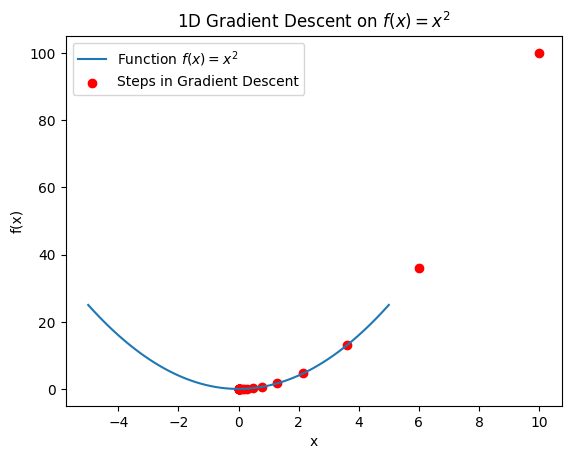

In [ ]:
def grad_1d(x):
    return 2 * x

def gradient_descent_1d(grad, cur_x=10, learning_rate=0.2, precision=0.0001, max_iters=10000):
    x_history = [cur_x]
    for i in range(max_iters):
        grad_cur = grad(cur_x)
        if abs(grad_cur) < precision:
            break
        cur_x -= learning_rate * grad_cur
        x_history.append(cur_x)
    return cur_x, x_history

x_min, x_hist = gradient_descent_1d(grad_1d)
x_vals = np.linspace(-5, 5, 100)
y_vals = x_vals ** 2

plt.figure()
plt.plot(x_vals, y_vals, label="Function $f(x) = x^2$")
plt.scatter(x_hist, [x ** 2 for x in x_hist], color="red", label="Steps in Gradient Descent")
plt.title("1D Gradient Descent on $f(x) = x^2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


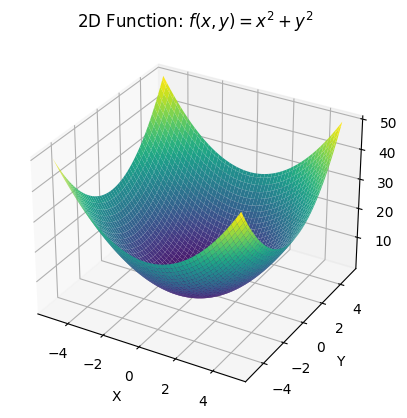

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# f(x, y) = x^2 + y^2
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("2D Function: $f(x, y) = x^2 + y^2$")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


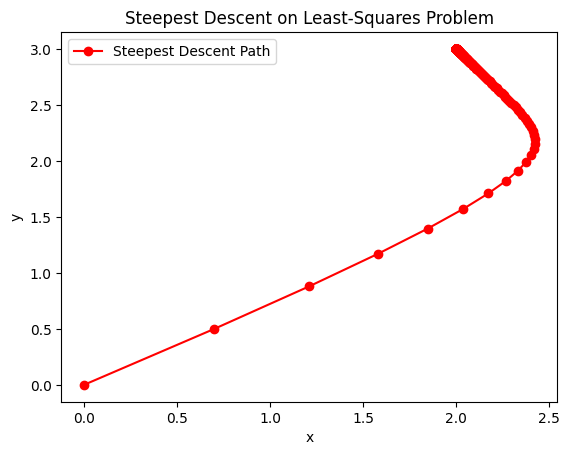

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Least-Squares Problem
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])

# Gradient of f(x)
def grad_f(x):
    return 2 * A.T @ (A @ x - b)

# Steepest descent algorithm
def steepest_descent(grad_f, x0, learning_rate=0.01, tol=1e-6, max_iters=1000):
    x = x0
    x_history = [x0]
    for i in range(max_iters):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        x = x - learning_rate * grad
        x_history.append(x)
    return x, x_history

x0 = np.array([0, 0])
x_min, x_hist = steepest_descent(grad_f, x0)

# Plot the convergence
x_vals = [x[0] for x in x_hist]
y_vals = [x[1] for x in x_hist]

plt.figure()
plt.plot(x_vals, y_vals, 'ro-', label="Steepest Descent Path")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Steepest Descent on Least-Squares Problem")
plt.legend()
plt.show()
